## All <code>air</code>

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output

import matplotlib.pyplot as plt # for Graphs
import matplotlib.ticker as ticker
plt.style.use('ggplot') # make the pragraph red
import seaborn as sns #

from datetime import datetime

%matplotlib inline

In [48]:
airstore = pd.read_csv('../input/air_store_info.csv')
airreserve = pd.read_csv('../input/air_reserve.csv')
airvisit = pd.read_csv('../input/air_visit_data.csv')

### merge <code>air_store_info</code> and <code>air_visit_data</code>

first we would like to merge those 2 tables<br>
and get the columns: <code>air_store_id</code>,<code>air_genre_name</code>,<code>air_area_name</code><br>
<code>latitude</code>,<code>longitude</code>,<code>visit_date</code>,<code>visitors</code><br>

##### Note : in the future we will get read from <code>latitude</code>,<code>longitude</code>,<code>air_area_name</code>.


##### some new varibles : <code>day_of_week</code> , <code>month</code>,<code>(latitude,longitude)</code>,<code>year</code>,


### Table <code>air_visit_data</code>
###### <code>day_of_week</code> , <code>month</code>,<code>year</code>, <code>day_of_the_year</code>, <code>day_of_month</code>

In [49]:
airvisit.head(1)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25


In [51]:
#  In order to get :
#  the 'year', 'month','dayofweek' , 'day' , 'day of month' , 'day of yaer'
# First step change to datetime
airvisit['visit_date'] = pd.to_datetime(airvisit['visit_date'])


# new column day of the week (0 to 6)
airvisit['day'] = airvisit['visit_date'].dt.dayofweek
#print(airvisit['day'].unique())

# new column day of the month (1 to 31)
airvisit['dm'] = airvisit['visit_date'].dt.day
#print(airvisit['dm'].unique())

# new column day of the year (1 to 366)
airvisit['dy'] = airvisit['visit_date'].dt.dayofyear
#print(len(airvisit['dy'].unique()))
#print(airvisit['dy'].min())


# new column month (1 to 12)
airvisit['month'] = airvisit['visit_date'].dt.month
#print(airvisit['month'].unique())

# new column year (2016 or 2017)
airvisit['year'] = airvisit['visit_date'].dt.year
#print(airvisit['year'].unique())

In [52]:
airvisit.head(1)

,air_store_id,visit_date,visitors,day,dm,dy,month,year
0,air_ba937bf13d40fb24,2016-01-13,25,2,13,13,1,2016


In [53]:
airvisit.shape

(252108, 8)

### Table <code>air_store_info</code>
###### <code>region</code> and classter<code>longtitude</code>and <code>latitude</code> with KMeans <br>
##### KMEAMS wiki

## column <code>region</code> from <code>air_area_name</code>

In [54]:
area_split = airstore['air_area_name'].str.split(' ', expand=True)
airstore['region'] = area_split[0]
print(len(airstore['region'].unique()))
print(airstore['region'].unique())

9
['Hyōgo-ken' 'Tōkyō-to' 'Fukuoka-ken' 'Ōsaka-fu' 'Hiroshima-ken'
 'Shizuoka-ken' 'Hokkaidō' 'Miyagi-ken' 'Niigata-ken']


## classter<code>longtitude</code>and <code>latitude</code> with KMeans <br>

## NOTE : not now to run this var 

In [41]:
airstore.head(1)

,air_store_id,air_genre_name,air_area_name,latitude,longitude,region
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken


In [42]:
airstore.shape

(829, 6)

In [43]:
#from sklearn.cluster import KMeans

In [44]:
#kmeans = KMeans(n_clusters=9, random_state=0).fit(airstore[['longitude','latitude']])
#airstore['cluster'] = kmeans.predict(airstore[['longitude','latitude']])

In [45]:
#airstore.head(1)

,air_store_id,air_genre_name,air_area_name,latitude,longitude,region,cluster
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,3


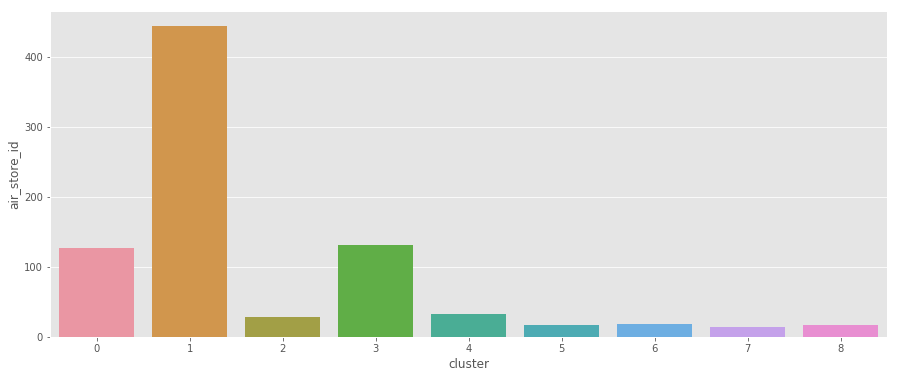

In [46]:
#f = plt.subplots(1,1,figsize=(15,6))
#hist_clust = airstore.groupby(['cluster'],as_index=False).count()
#sns.barplot(x=hist_clust['cluster'],y=hist_clust['air_store_id'])
#plt.show()

## MERGE

In [55]:
# first i will do copy in order to save me work 
full = airvisit.copy()

In [57]:
full = pd.merge(airvisit,airstore,on=['air_store_id']) # the defult of how=inner

In [61]:
print(full.shape)
print(full.columns)

(252108, 13)
Index(['air_store_id', 'visit_date', 'visitors', 'day', 'dm', 'dy', 'month',
       'year', 'air_genre_name', 'air_area_name', 'latitude', 'longitude',
       'region'],
      dtype='object')


In [63]:
full.head(1)

,air_store_id,visit_date,visitors,day,dm,dy,month,year,air_genre_name,air_area_name,latitude,longitude,region
0,air_ba937bf13d40fb24,2016-01-13,25,2,13,13,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to


In [65]:
#air_ba937bf13d40fb24
full[full['air_store_id'] == 'air_ba937bf13d40fb24']

,air_store_id,visit_date,visitors,day,dm,dy,month,year,air_genre_name,air_area_name,latitude,longitude,region
0,air_ba937bf13d40fb24,2016-01-13,25,2,13,13,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
1,air_ba937bf13d40fb24,2016-01-14,32,3,14,14,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
2,air_ba937bf13d40fb24,2016-01-15,29,4,15,15,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
3,air_ba937bf13d40fb24,2016-01-16,22,5,16,16,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
4,air_ba937bf13d40fb24,2016-01-18,6,0,18,18,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
5,air_ba937bf13d40fb24,2016-01-19,9,1,19,19,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
6,air_ba937bf13d40fb24,2016-01-20,31,2,20,20,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
7,air_ba937bf13d40fb24,2016-01-21,21,3,21,21,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
8,air_ba937bf13d40fb24,2016-01-22,18,4,22,22,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to
9,air_ba937bf13d40fb24,2016-01-23,26,5,23,23,1,2016,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to


In [ ]:
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
    air_reserve['visit_datetime'] = air_reserve['visit_datetime'].dt.date
    air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])
    air_reserve['reserve_datetime'] = air_reserve['reserve_datetime'].dt.date
    air_reserve['reserve_datetime_diff'] = air_reserve.apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
    tmp1 = air_reserve.groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs_sum', 'reserve_visitors':'rv_sum'})
    tmp2 = air_reserve.groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].mean().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs_mean', 'reserve_visitors':'rv_mean'})